In [1]:
%matplotlib inline

import setGPU
import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import glob
from scipy.stats import skew, kurtosis

setGPU: Setting GPU to: 0


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from plots import loadModel, getMetric, sortMeans, plotMean, plotMeans, plotStd, plotStds, plotVar, plotSkew, plotKurtosis

In [3]:
all_g_weight1 = '/nfshome/vitoriabp/hgcal_wgan/trial23/weights/generator_weights_epoch_*.h5'
gen_model1 = '/nfshome/vitoriabp/hgcal_wgan/trial23/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_shuffle.json'

In [8]:
all_g_weight2 = '/nfshome/vitoriabp/hgcal_wgan/trial27/weights/generator_weights_epoch_*.h5'
gen_model2 = '/nfshome/vitoriabp/hgcal_wgan/trial27/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'

In [5]:
#all_g_weight2 = '/nfshome/vitoriabp/hgcal_wgan/trial26/weights/generator_weights_epoch_*.h5'
#gen_model2 = '/nfshome/vitoriabp/hgcal_wgan/trial26/weights/generator_model_change_discriminator.json'

In [5]:
means1, stds1, epochs1, vars1, skews1, kurtoses1 = getMetric(all_g_weight1, gen_model1)

Using TensorFlow backend.


In [9]:
means2, stds2, epochs2, vars2, skews2, kurtoses2 = getMetric(all_g_weight2, gen_model2)

In [10]:
epoch_mean_sorted1 = sortMeans(epochs1, means1)

In [11]:
epoch_mean_sorted2 = sortMeans(epochs2, means2)

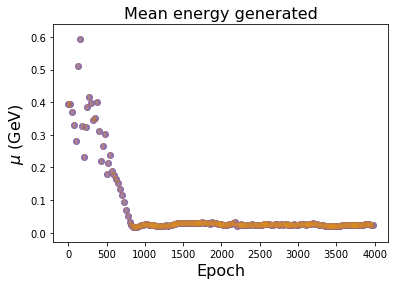

In [12]:
plotMean(epoch_mean_sorted1)

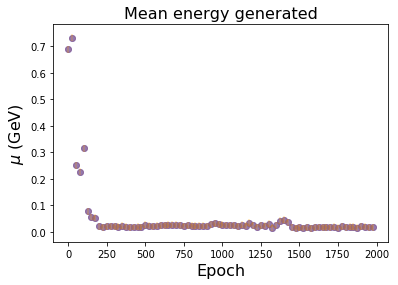

In [13]:
plotMean(epoch_mean_sorted2)

### Mean should be 0.02276984

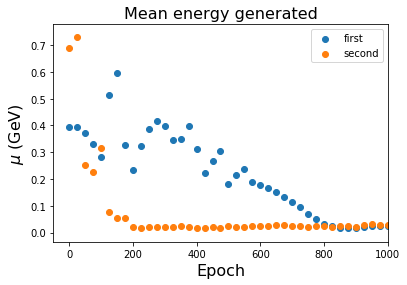

In [14]:
plotMeans(epoch_mean_sorted1, epoch_mean_sorted2)

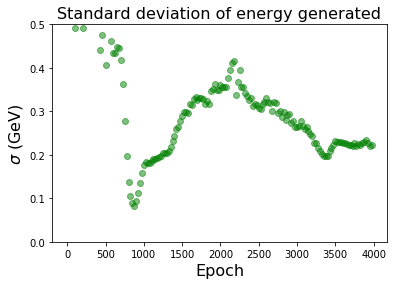

In [15]:
plotStd(epochs1, stds1)

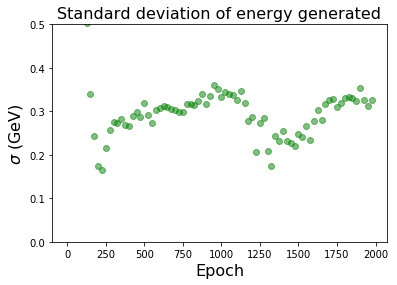

In [16]:
plotStd(epochs2, stds2)

### Std should be 0.3552384

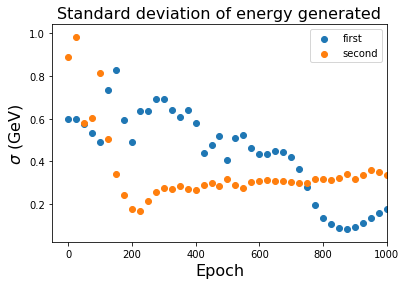

In [17]:
plotStds(epochs1, stds1, epochs2, stds2)

### Aim for variance 0.12619433

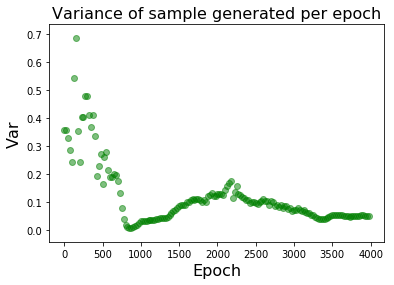

In [18]:
plotVar(epochs1, vars1)

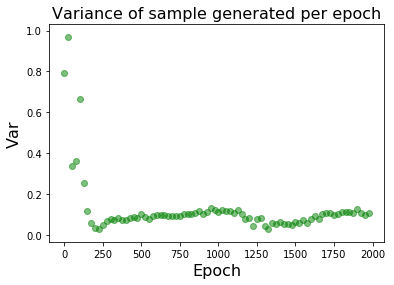

In [19]:
plotVar(epochs2, vars2)

### Skew should be 34.635719299316406

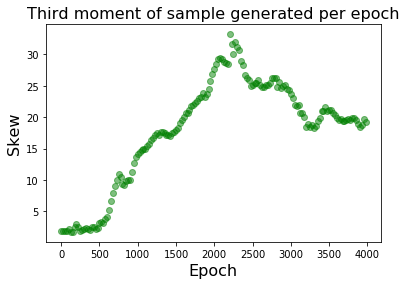

In [20]:
plotSkew(epochs1, skews1)

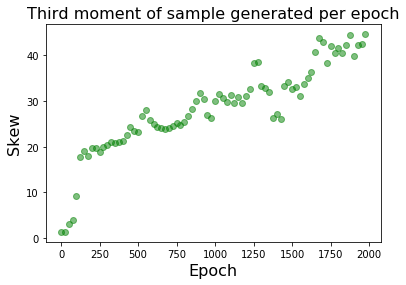

In [21]:
plotSkew(epochs2, skews2)

### Kurtosis should be 1764.2194336137854

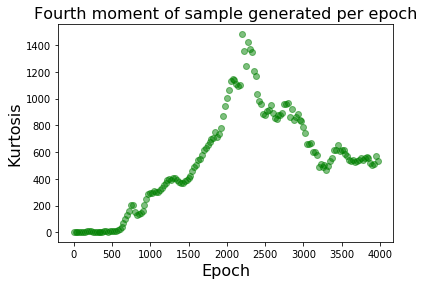

In [22]:
plotKurtosis(epochs1, kurtoses1)

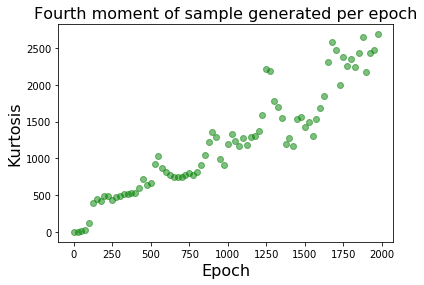

In [24]:
plotKurtosis(epochs2, kurtoses2)

# ------------ STOP EXECUTING HERE ------------------

In [68]:
f = h5py.File('/bigdata/shared/HGCAL_data/new/all_noPU.h5', 'r')
X = np.asarray(f['X'])
X = X.squeeze()

In [69]:
X.shape

(195386, 16, 16, 55)

In [72]:
np.mean(X)

0.02276984

In [71]:
np.var(X)

0.12619433

In [73]:
np.std(X)

0.3552384

In [74]:
skew(X, axis=None)

34.635719299316406

In [75]:
kurtosis(X, axis=None)

1764.2194336137854